# Lab 5

Date: December 7, 2020

Link to Github repository: https://github.com/mthangarajah/Labs.git

In [2]:
#Load the packages 
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
import pandas as pd
import matplotlib.pyplot as plt

## Question 1:

### a) Generate a simulated data set with 20 observations in each of three classes (i.e. 60 observations total), and 50 variables.

In [18]:
#Simulated data using make_blobs with 60 observations, 50 variables and 3 classes for each 20 observation
X,y_true = make_blobs(n_samples = 60, n_features = 50,centers = 3, cluster_std = 14)

### b) Perform K-means clustering of the observations with K = 3. How well do the clusters that you obtained in K-means clustering compare to the true class labels (Hint: use pd.crosstab to make a contingency table of the results)?

In [19]:
# Create variable kmeans3 for k-means clustering with k=3
kmeans3 = KMeans(n_clusters = 3)

#Fit the k-means3 above onto the array
kmeans3.fit(X)

#Create new variable to predict the y values from the fitted kmeans3 from above
y_kmeans3 = kmeans3.predict(X)

#Create contigency table of results using crosstab of the true y values and the predicted y values
pd.crosstab(y_true, y_kmeans3, rownames = ["Class Labels"], colnames = ["Clusters"])

Clusters,0,1,2
Class Labels,,,
0,0,0,20
1,1,18,1
2,16,2,2


Class 0 variables are all in cluster 2. Class 1 variables are mainly in cluster 1, with one in cluster 0. Class 2 is mainly in cluster 0, with a couple in cluster 1 and cluster 2. Therefore, the clusters obtained through k-means clustering did not properly place all the variables in the same cluster. Some variables were correctly place together, like the variables with a class label of 0. 

### c) Perform K-means clustering with K = 2. Describe your results.

In [20]:
# Create variable kmeans2 for k-means clustering with k=2
kmeans2 = KMeans(n_clusters = 2)

#Fit the k-means2 above onto the array
kmeans2.fit(X)

#Create new variable to predict the y values from the fitted kmeans2 from above
y_kmeans2 = kmeans2.predict(X)

#Create contigency table of results using crosstab of the true y values and the predicted y values
pd.crosstab(y_true, y_kmeans2,rownames = ["Class Labels"], colnames = ["Clusters"])

Clusters,0,1
Class Labels,,
0,12,8
1,19,1
2,2,18


Class 0 variables were mainly in cluster 0 with some in cluster 1. Class 1 variables were mainly in cluster 0, with one in cluster 1. Class 2 variables were mainly in cluster 2, with some in cluster 0. When k=2, there were two main clusters. Cluster 0 contained majority of the variables in class 0, 1, and few from class 2 while cluster 1 had majority of the variables with class labels of 1 and 2 with some from class 0. 

### d) Now perform K-means clustering with K = 4 and describe your results.

In [21]:
# Create variable kmeans4 for k-means clustering with k=4
kmeans4 = KMeans(n_clusters = 4)

#Fit the k-means4 above onto the array
kmeans4.fit(X)

#Create new variable to predict the y values from the fitted kmeans4 from above
y_kmeans4 = kmeans4.predict(X)

#Create contigency table of results using crosstab of the true y values and the predicted y values
pd.crosstab(y_true,y_kmeans4,rownames = ["Class Labels"], colnames = ["Clusters"])

Clusters,0,1,2,3
Class Labels,,,,
0,5,0,15,0
1,1,18,0,1
2,9,1,0,10


Class 0 variables were mainly in cluster 2, with few in cluster 0. Class 1 variables were mostly in cluster 1 with one each in cluster 0 and cluster 3. Class 2 variables had half of the variables in cluster 3 and the other half in cluster 0, with one in cluster 1.

### e) Perform K-means clustering with K = 3 on the data after scaling each variable to have standard deviation one. How do these results compare to those obtained in (b)? Explain.

In [22]:
# Create variable to assign standard scaler
scaler = StandardScaler()

#Fit the array 
scaler.fit(X)

#Transform the fitted array so every variable has standard deviation of 1
# Assign to a variable
standard_x = scaler.transform(X)

In [23]:
#Fit the k-means3 above onto the transformed array
kmeans3.fit(standard_x)

#Create new variable to predict the y values from the fitted kmeans3 from above
y_kmeans3_scale = kmeans3.predict(standard_x)

#Create contigency table of results using crosstab of the true y values and the predicted y values
pd.crosstab(y_true,y_kmeans3_scale,rownames = ["Class Labels"], colnames = ["Clusters"])

Clusters,0,1,2
Class Labels,,,
0,0,20,0
1,17,2,1
2,3,2,15


Class 0 variables were all in cluster 1. Class 1 variables were mainly in cluster 0 with some in cluster 1 and one in cluster 2. Class 2 variables were mainly in cluster 2 with a few each in cluster 0 and cluster 1. The results obtained from b were very similar to the results obtained here after standardizing the variables. Therefore, scaling the variables did not affect the k-means clustering for these variables. 

## Question 2:

### a) Load the data – note that there is no header so you will need to read this in without one.

In [24]:
#Load the data and indicate that there is no header
#Assign to a variable
df = pd.read_csv("Ch10Ex11.csv", header=None)

In [32]:
#Transpose the dataframe to cluster on the genes
df_transpose = df.T

### b) Apply hierarchical clustering to the samples. Use all combinations of correlation and Euclidian distance with single, average and complete linkage. Plot the dendrograms. Do the genes separate the samples into the two groups? Do the results change with distance and linkage? How?

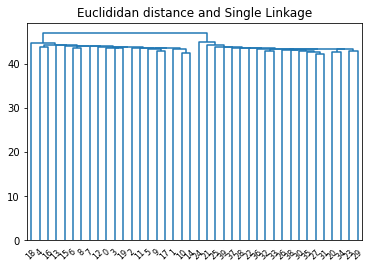

In [26]:
#Create an dendogram using the transposed dataframe using single linkage with Euclidian distance
shc.dendrogram(shc.linkage(df_transpose, method='single', metric = "euclidean"))

#Title of the plot
plt.title("Euclididan distance and Single Linkage")

#Show the plot
plt.show()

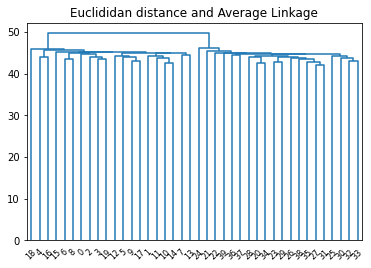

In [27]:
#Create an dendogram using the transposed dataframe using average linkage with Euclidian distance
shc.dendrogram(shc.linkage(df_transpose, method='average', metric = "euclidean"))

#Title of the plot
plt.title("Euclididan distance and Average Linkage")

#Show the plot
plt.show()

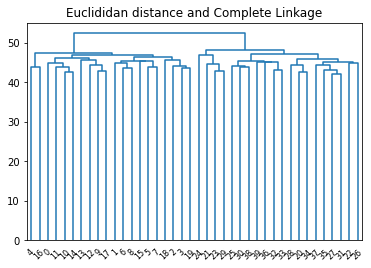

In [28]:
#Create an dendogram using the transposed dataframe using complete linkage with Euclidian distance
shc.dendrogram(shc.linkage(df_transpose, method='complete', metric = "euclidean"))

#Title of the plot
plt.title("Euclididan distance and Complete Linkage")

#Show the plot
plt.show()

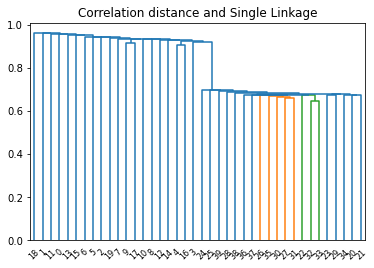

In [29]:
#Create an dendogram using the transposed dataframe using single linkage with correlation distance
shc.dendrogram(shc.linkage(df_transpose, method='single', metric = "correlation"))

#Title of the plot
plt.title("Correlation distance and Single Linkage")

#Show the plot
plt.show()

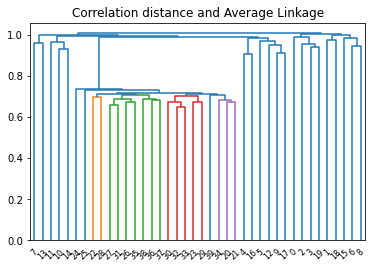

In [30]:
#Create an dendogram using the transposed dataframe using average linkage with correlation distance
shc.dendrogram(shc.linkage(df_transpose, method='average', metric = "correlation"))

#Title of the plot
plt.title("Correlation distance and Average Linkage")

#Show the plot
plt.show()

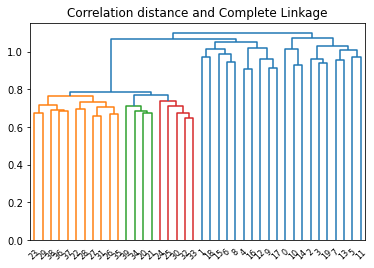

In [31]:
#Create an dendogram using the transposed dataframe using complete linkage with correlation distance
shc.dendrogram(shc.linkage(df_transpose, method='complete', metric = "correlation"))

#Title of the plot
plt.title("Correlation distance and Complete Linkage")

#Show the plot
plt.show()

By using the Euclididan distance, each of the different linkages (complete, average and single) split the samples into two main groups. The single linkage, complete linkage and average linkage with Euclididan distance further splits the two groups into smaller groups. However, the results change when using correlation distance. Correlation distance with complete linkage and average linkage produce three groups. Correlation distance with single linkage splits the group individually by sample, meaning there isn't two groups of the samples seen in the dendogram plot.